In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import os
import astropy.io.fits as fits
from astropy.table import Table
from desitarget import desi_mask, bgs_mask, mws_mask, contam_mask
from desiutil.plots import prepare_data, init_sky, plot_sky_circles, plot_sky_binned
from desiutil.log import get_logger
import warnings
import mpl_toolkits
%matplotlib inline

In [2]:
import healpy

In [10]:
program = 'dark'
topdir = os.path.join("/hpcfs/home/ciencias/fisica/docentes/je.forero/desidata/test_20170508/")
truthfile = os.path.join(topdir, 'input/{}/'.format(program), 'truth.fits')
targetfile = os.path.join(topdir, 'input/{}/'.format(program), 'targets.fits')
zcatfile = os.path.join(topdir, 'output/{}/4'.format(program), 'zcat.fits')
skyfile = os.path.join(topdir, 'input/{}/'.format(program), 'sky.fits')
stdstarsfile = os.path.join(topdir, 'input/{}/'.format(program), 'stdstars.fits')

In [4]:
targets  = fits.getdata(targetfile)

In [5]:
Table(targets[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME,DECAM_FLUX [6],SHAPEDEV_R,SHAPEEXP_R,DEPTH_R,GALDEPTH_R
int64,float64,float64,int64,int64,int64,float64,float64,str8,float32,float32,float32,float32,float32
1913083273142325984,9.59603287191,-7.96864299891,4,0,0,0.874412621321,1.0,0098m080,0.0 .. 0.0,0.0,0.0,24.7716,24.4795
2771587901724092043,2.46544022805,-14.7033657602,4,0,0,0.339985051046,1.0,0023m145,0.0 .. 0.0,0.0,0.0,23.9023,23.6205
969669320400918333,5.65710217668,-8.69037459083,4,0,0,0.19649634412,1.0,0057m085,0.0 .. 0.0,0.0,0.0,21.9372,21.7386
3524774154980433357,9.52008938818,-8.14619205472,4,0,0,0.689182304402,1.0,0093m080,0.0 .. 0.0,0.0,0.0,24.8698,24.5472
3815924188513168547,9.87313688016,-5.47601742467,4,0,0,0.412090351859,1.0,0097m055,0.0 .. 0.0,0.0,0.0,24.6583,24.3936
2574966351288023565,3.72897315425,-13.201883338,4,0,0,0.0331880302021,1.0,0038m130,0.0 .. 0.0,0.0,0.0,24.9373,24.6974
3910964841860800689,5.42150220456,-10.2811286749,4,0,0,0.0367054553279,1.0,0053m105,0.0 .. 0.0,0.0,0.0,24.7737,24.4967
2839749178270131820,6.71776150313,-10.8874062533,4,0,0,0.8465572925,1.0,0068m110,0.0 .. 0.0,0.0,0.0,23.7261,23.4912
494347467813955667,2.29951992127,-11.226112242,4,0,0,0.524939003802,1.0,0022m110,0.0 .. 0.0,0.0,0.0,24.2043,23.9255


In [18]:
def qadensity(cat, objtype, targdens=None, max_bin_area=10.0):
    label = '{} (targets/deg$^2$)'.format(objtype)
    if targdens:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig, ax = plt.subplots(1)
    ax = np.atleast_1d(ax)
    
    basemap = init_sky(galactic_plane_color='k', ax=ax[0]);
    basemap, data = plot_sky_binned(cat['RA'], cat['DEC'], max_bin_area=max_bin_area,
                                    clip_lo='!1', cmap='jet', plot_type='healpix', 
                                    label=label, basemap=basemap)
    if targdens:
        dens = data[np.nonzero(data)]
        ax[1].hist(dens, bins=40, histtype='stepfilled', alpha=0.6, label='Observed {} Density'.format(objtype))
        if objtype in targdens.keys():
            ax[1].axvline(x=targdens[objtype], ls='--', color='k', label='Goal {} Density'.format(objtype))
        ax[1].set_xlabel(label)
        ax[1].set_ylabel('Number of Healpixels')
        ax[1].legend(loc='upper left', frameon=False)
        fig.subplots_adjust(wspace=0.2)
    return dens

In [19]:
# Desired target densities, including contaminants.
targdens = {'ELG': 2400, 'LRG': 350, 'QSO': 260, 'SKY': 1400}

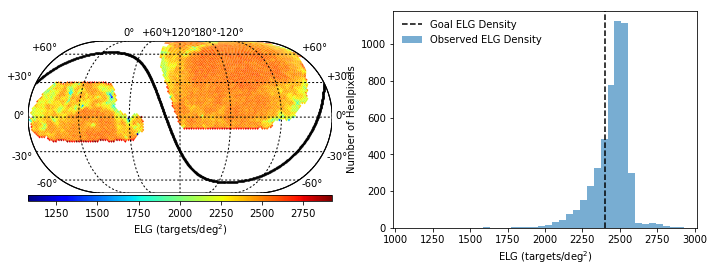

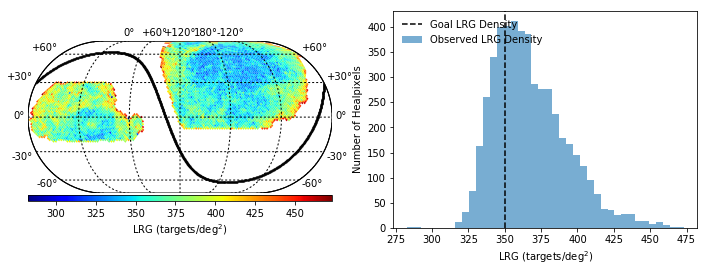

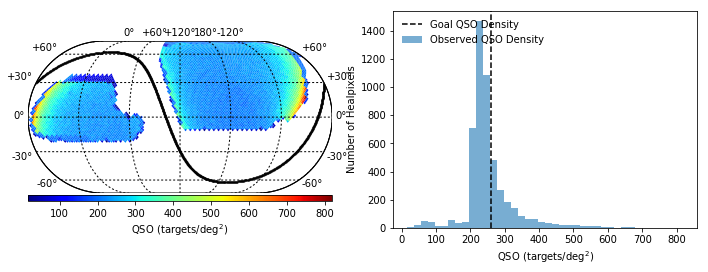

In [20]:
for obj in ['ELG','LRG','QSO']:
    these = (targets['DESI_TARGET'] & desi_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens)

In [21]:
sky  = fits.getdata(skyfile)

In [26]:
Table(sky[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME
int64,float64,float64,int64,int64,int64,float64,float64,str8
847059552979818045,145.739776611,14.1148290634,4294967296,0,0,0.137284754593,7.0,1457p140
113248706240611123,234.913635254,34.0901298523,4294967296,0,0,0.105008817214,7.0,2349p340
2994809343532731068,19.7740898132,5.02604961395,4294967296,0,0,0.833754140881,7.0,0198p050
3557963051456115431,143.500137329,70.9557037354,4294967296,0,0,0.00299365549984,7.0,1429p710
3608696163881758674,26.6104316711,14.5823869705,4294967296,0,0,0.900498026228,7.0,0265p145
2082938370702717937,8.97276592255,-5.65229272842,4294967296,0,0,0.338785405271,7.0,0087m055
3005958361453749994,327.609344482,8.20268726349,4294967296,0,0,0.217031425079,7.0,3274p080
763434001029505907,172.737503052,6.86790084839,4294967296,0,0,0.112156267676,7.0,1727p070
4442474944884096078,223.455322266,21.3809604645,4294967296,0,0,0.208572239683,7.0,2236p215


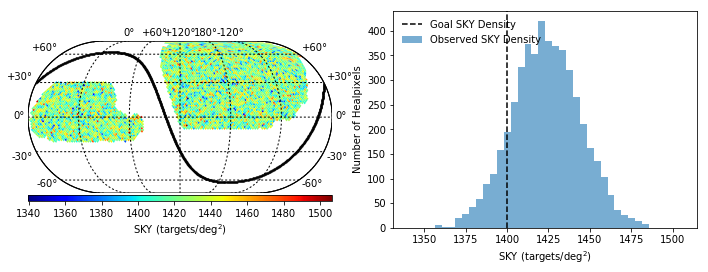

In [22]:
a = qadensity(sky, 'SKY', targdens=targdens)


In [23]:
stdstars  = fits.getdata(stdstarsfile)

In [25]:
Table(stdstars[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME
int64,float64,float64,int64,int64,int64,float64,float64,str8
257733321435202562,8.04194677586,-13.4505378348,8589934592,0,0,0.109953814235,7.0,0079m135
3963063933366171878,1.68180853392,-5.98014031153,8589934592,0,0,0.479076933916,7.0,0017m060
953162882498759315,8.27662921784,-5.6442883131,8589934592,0,0,0.274796774965,7.0,0082m055
934477131090988370,8.97825774448,-11.3710881689,8589934592,0,0,0.026729235691,7.0,0088m115
3496543140219928248,7.64731417299,-12.8674511458,8589934592,0,0,0.33889129482,7.0,0074m130
4399880739973084079,2.65673618694,-14.2071609038,8589934592,0,0,0.183426189336,7.0,0028m140
4398890563398508994,2.63616404354,-8.21282450869,8589934592,0,0,0.981103754703,7.0,0027m080
2873903332299811057,3.14815807228,-6.25421669657,8589934592,0,0,0.0741276506663,7.0,0032m065
1679054201284745074,8.7283628457,-7.59919552326,8589934592,0,0,0.363230148632,7.0,0087m075


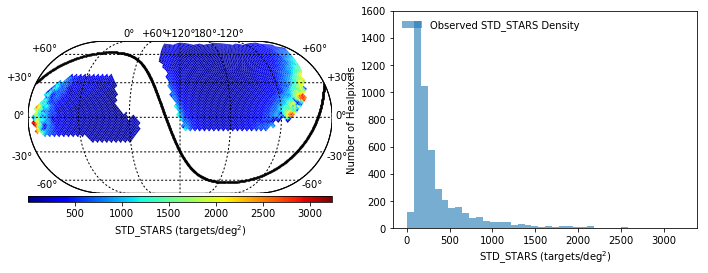

In [27]:
a = qadensity(stdstars, 'STD_STARS', targdens=targdens)

In [28]:
truth  = fits.getdata(truthfile)

In [29]:
Table(truth[:10])

TARGETID,RA,DEC,TRUEZ,TRUETYPE,SOURCETYPE,BRICKNAME,OIIFLUX
int64,float64,float64,float64,str10,str10,str8,float64
1913083273142325984,9.59603287191,-7.96864299891,4.80039780086e-05,STAR,QSO,0098m080,0.0
2771587901724092043,2.46544022805,-14.7033657602,6.62120583002e-05,STAR,QSO,0023m145,0.0
969669320400918333,5.65710217668,-8.69037459083,2.42569913098e-05,STAR,QSO,0057m085,0.0
3524774154980433357,9.52008938818,-8.14619205472,5.42776288057e-05,STAR,QSO,0093m080,0.0
3815924188513168547,9.87313688016,-5.47601742467,6.16636389168e-05,STAR,QSO,0097m055,0.0
2574966351288023565,3.72897315425,-13.201883338,2.29916677199e-05,STAR,QSO,0038m130,0.0
3910964841860800689,5.42150220456,-10.2811286749,4.0815819375e-05,STAR,QSO,0053m105,0.0
2839749178270131820,6.71776150313,-10.8874062533,6.42264785711e-05,STAR,QSO,0068m110,0.0
494347467813955667,2.29951992127,-11.226112242,0.000103471109469,STAR,QSO,0022m110,0.0


In [32]:
print(set(truth['TRUETYPE']))

{'GALAXY', 'QSO', 'STAR'}


In [33]:
print(set(truth['SOURCETYPE']))

{'ELG', 'QSO', 'LRG'}


In [34]:
zcat = fits.getdata(zcatfile)

In [35]:
Table(zcat[:10])

TARGETID,BRICKNAME,SPECTYPE,Z,ZERR,ZWARN,NUMOBS
int64,str8,str10,float64,float32,int32,int32
2839749178270131820,,STAR,-2.96298555511e-05,6.00454e-05,0,1
1623952395678799911,,STAR,0.000180741169096,6.00485e-05,0,1
4065549967834671323,,STAR,0.000187286610783,6.00435e-05,0,1
502182197015564246,,STAR,8.68219955596e-05,6.00426e-05,0,1
2721882347830478322,,STAR,9.18056618943e-05,6.00459e-05,0,1
3563747268534601935,,STAR,8.58258566217e-05,6.00478e-05,0,1
2367940352441509479,,STAR,3.03406574576e-05,6.00417e-05,0,1
2956723065468913643,,STAR,0.00012724683673,6.00444e-05,0,1
3623063040593847008,,STAR,7.49692058037e-05,6.00463e-05,0,1


In [37]:
print(set(zcat['SPECTYPE']))

{'GALAXY', 'QSO', 'STAR'}


In [71]:
these = (zcat['SPECTYPE']=='GALAXY') & (zcat['ZWARN']==0)
#    observed_id = 
#    dd = zcat[these]
#    a = qadensity(dd, obj, targdens=targdens)

In [72]:
observed_id = zcat['TARGETID'][these]

In [73]:
id_list = np.in1d(truth['TARGETID'], observed_id)

In [74]:
dd = targets[id_list]

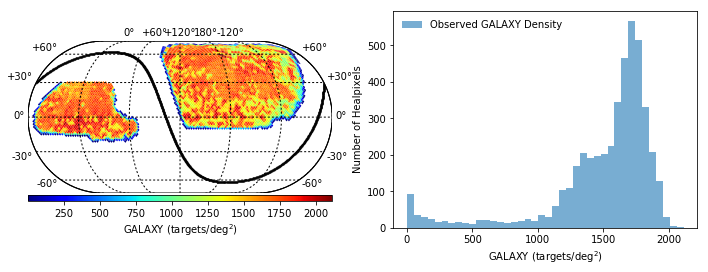

In [78]:
obj = 'GALAXY'
a = qadensity(dd, obj, targdens=targdens)

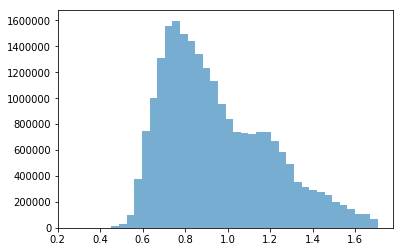

In [76]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=40, histtype='stepfilled', alpha=0.6)

In [70]:
these = (zcat['SPECTYPE']=='QSO') & (zcat['ZWARN']==0)
observed_id = zcat['TARGETID'][these]
id_list = np.in1d(truth['TARGETID'], observed_id)
dd = targets[id_list]

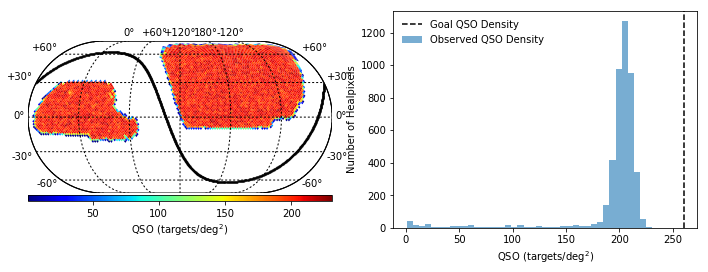

In [65]:
obj = 'QSO'
a = qadensity(dd, obj, targdens=targdens, max_bin_area=10.0)

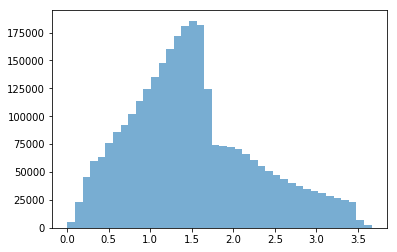

In [69]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=40, histtype='stepfilled', alpha=0.6)

In [79]:
these = (zcat['SPECTYPE']=='STAR') & (zcat['ZWARN']==0)
observed_id = zcat['TARGETID'][these]
id_list = np.in1d(truth['TARGETID'], observed_id)
dd = targets[id_list]

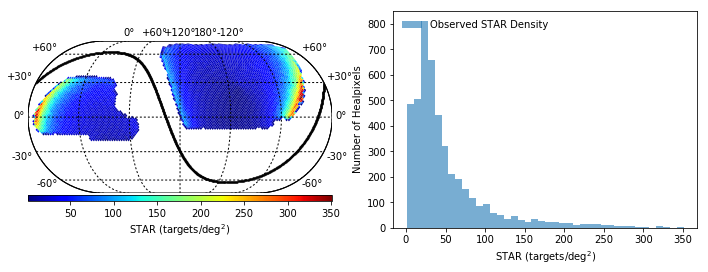

In [80]:
obj = 'STAR'
a = qadensity(dd, obj, targdens=targdens, max_bin_area=10.0)

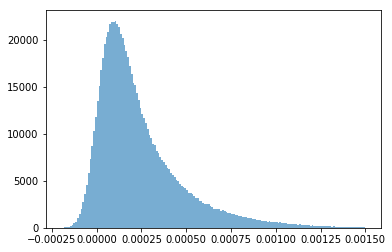

In [92]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=170, range=(-0.0002, 0.0015), histtype='stepfilled', alpha=0.6)